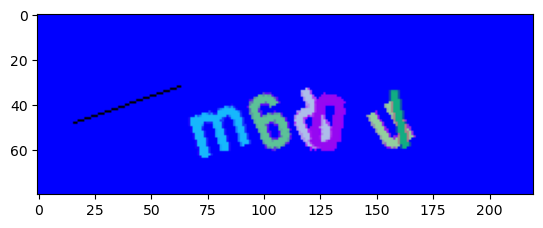

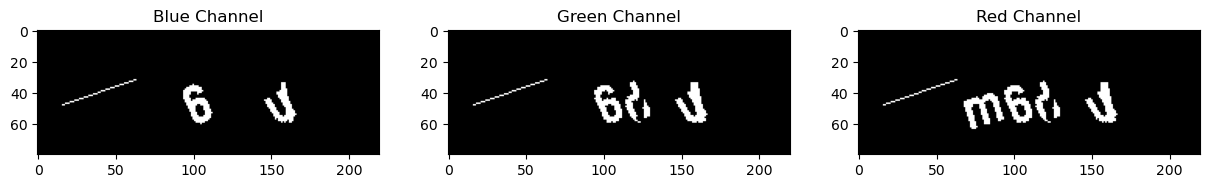

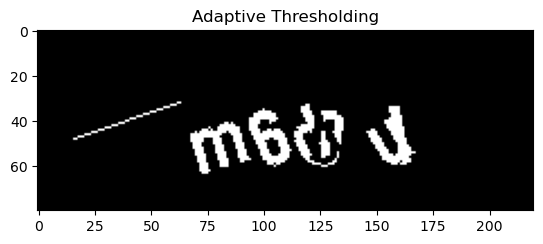

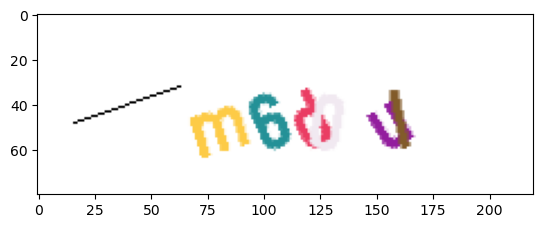

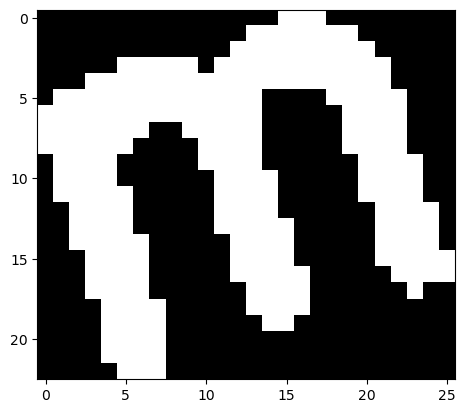

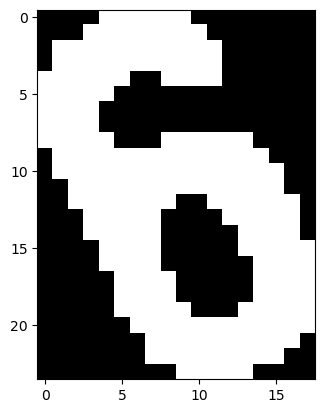

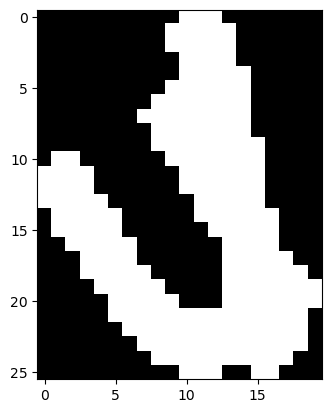

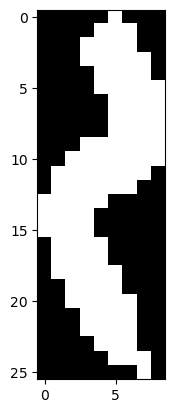

Segmentation completed!


In [59]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Create output folder for segmented characters
output_folder = "extracted_letter_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load the CAPTCHA image
image_path = "train/m6d0ul-0.png"  
image = cv2.imread(image_path)
# img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.imshow(img)
# plt.title("Original Image")
# plt.show()

# im_bw_inverted = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# plt.imshow(im_bw_inverted, cmap='gray')
# plt.title("Adaptive Thresholding")
# plt.show()

# image = cv2.medianBlur(im_bw_inverted, 3)
# plt.imshow(image, cmap='gray')
# plt.show()


# Split the image into RGB channels
blue_channel, green_channel, red_channel = cv2.split(image)
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_image)
plt.show()



# Function to apply adaptive thresholding to each channel
def process_channel(channel):
    # thresh_img = cv2.adaptiveThreshold(channel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 101, 5)
    _, thresh_img = cv2.threshold(channel, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresh_img



# Process each channel separately
processed_blue = process_channel(blue_channel)
processed_green = process_channel(green_channel)
processed_red = process_channel(red_channel)

# Show the processed channels
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(processed_blue, cmap='gray'), plt.title("Blue Channel")
plt.subplot(1, 3, 2), plt.imshow(processed_green, cmap='gray'), plt.title("Green Channel")
plt.subplot(1, 3, 3), plt.imshow(processed_red, cmap='gray'), plt.title("Red Channel")
plt.show()

# Combine the processed channels (OR operation)
# combined = cv2.bitwise_or(cv2.bitwise_or(processed_blue, processed_green), processed_red)

# Show the combined image
# plt.imshow(combined, cmap='gray')
# plt.title("Combined Channels after Thresholding")
# plt.show()

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
im_bw_inverted = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(im_bw_inverted, cmap='gray')
plt.title("Adaptive Thresholding")
plt.show()

im_bw_inverted = cv2.medianBlur(im_bw_inverted, 3)
plt.imshow(image, cmap='gray')
plt.show()

# Apply morphological closing operation to the combined image to enhance character boundaries
kernel = np.ones((1, 1), np.uint8)  # Adjust kernel size as needed
closed = cv2.morphologyEx(im_bw_inverted, cv2.MORPH_CLOSE, kernel)

# Find contours again after applying closing operation
cnts = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 50  # Adjust min area to capture individual characters
image_number = 0

for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(c)
        # Draw a rectangle around each detected character
        cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)
        # Extract each character as a Region of Interest (ROI)
        ROI = closed[y:y+h, x:x+w]
        plt.imshow(ROI, cmap='gray')
        plt.show()
        # Save the character as an individual image
        cv2.imwrite(os.path.join(output_folder, f"char_{image_number}.png"), ROI)
        image_number += 1

print("Segmentation completed!")


In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Create output folder for segmented characters
output_folder = "extracted_letter_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load the CAPTCHA image
image_path = "train/1lib-0.png"  
image = cv2.imread(image_path)